## ANALYSING GENE EXPRESSION DATA OF KIDNEY CANCER PATIENTS 

Authors: 

         Sumeyye Su-(sumeyye.su@mavs.uta.edu) PhD student,Department of Mathematics in the University of Texas at Arlington
         Leili Shahriyari (lshahriyari@umass.edu, Advisor, Department of Mathematics and Statisics, University of Massachusetts Amherst


We downloaded TCGA provisional data of patients with Kidney Renal Clear Cell Carcinoma (RCC) from the cBioPortal. There are 534 patients and 20531 genes that means data set is an 534x20531-dimensional matrix with expression of genes for each patients. 

Since each patients have different gene expression values, we use simple feature scaling normalization methods to avoid different intrincis influence on analysis. 
In other words, we found maximum gene expression value of each patient, and then we divided the values of each gene by the maximum gene expression values for the patient. 

After that, we calculated the standard deviation of each gene across sample. we see that many of the gene have similar low variance while some of them have higher variance. Thus, we choose a treshold to see top genes with highest variance. 

We found that RGS5 gene is one of the top 10 genes with the highest variance. 

We combined rna data and clinical data to see the relation between the gene and features about prognostic of the kidney cancer. Then we divided the data set subcategories based on gender, tumor status, survival status, laterality, serum calcium level, white blood cell, grade and stage of tumor. 

We plot the graphs of compression of expression of level of RGS5 gene by the features, and employed Mann-Whitney-Wilcoxon (MWW) test for statistical analyis of the results. 


In [9]:
#import some useful libraries
import os
import pandas as pd
import seaborn as sns
import scipy.stats as sp
from scipy import stats
import matplotlib.pylab as plt
import numpy as np
from scipy.stats import mannwhitneyu
from statannot import add_stat_annotation
import matplotlib.pylab as plt
#reading the data from the location of the data
notebook_path=os.path.dirname('RGS5_code1.ipynb')
location_of_data=notebook_path+ "kidneydata/"
rna_file_name= "data_RNA_Seq_v2_expression_median.txt"
rna_file_path= location_of_data+ rna_file_name
clinical_file_name = "data_bcr_clinical_data_patient.txt"

In [10]:
rna = pd.read_csv(rna_file_path,  sep='\t')
#to make sure we do not process the name of genes we will convert them to string
rna[['Hugo_Symbol', 'Entrez_Gene_Id']] = rna[['Hugo_Symbol', 'Entrez_Gene_Id']].astype(str)
rna.head()

,Hugo_Symbol,Entrez_Gene_Id,TCGA-3Z-A93Z-01,TCGA-6D-AA2E-01,TCGA-A3-3306-01,TCGA-A3-3307-01,TCGA-A3-3308-01,TCGA-A3-3311-01,TCGA-A3-3313-01,TCGA-A3-3316-01,...,TCGA-G6-A5PC-01,TCGA-G6-A8L6-01,TCGA-G6-A8L7-01,TCGA-G6-A8L8-01,TCGA-GK-A6C7-01,TCGA-MM-A563-01,TCGA-MM-A564-01,TCGA-MM-A84U-01,TCGA-MW-A4EC-01,TCGA-T7-A92I-01
0,LOC100130426,100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,UBE2Q2P3,100133144,2.9608,2.4501,3.2246,1.8578,6.4640,10.4052,6.5100,14.6871,...,1.2346,3.6669,0.0000,0.7315,1.8520,5.0603,17.1276,2.7042,12.5228,3.8379
2,UBE2Q2P3,100134869,11.4669,2.4069,8.1625,4.1055,2.7113,4.9358,13.1356,10.4830,...,1.7049,3.8725,8.1466,4.8240,4.5562,3.4824,2.9855,8.5634,8.3895,9.6231
3,LOC149767,10357,75.7771,49.6384,70.2692,94.6101,89.7213,87.6572,62.6849,111.4014,...,38.0452,83.2008,39.2057,77.0403,58.0551,102.8342,95.3237,62.0845,104.6356,72.3542
4,TIMM23,10431,563.9369,1313.5456,601.9669,546.3303,721.6424,700.0167,983.0508,423.1293,...,2193.6432,680.6032,1364.5621,580.5455,494.0724,649.2462,654.3055,1256.3380,581.0354,1088.8424


In [11]:
def normalizing_patients(df_rna):
    
    """
        input df_rna: rna-seq data frame that includes two columns of 'Hugo_Symbol', 'Entrez_Gene_Id'
            columns are patients, and rows are genes
        output df_normalized_rna: normalized (scaled) data
        function:  using pandas methods dividing the value of each gene for each patient 
                by the maximum value of that patient.
    """
    
    #drop name of genes
    df_rna_values =  df_rna.drop(['Hugo_Symbol', 'Entrez_Gene_Id'], axis=1) 
    
    #finding maximum level expression of genes for each patient
    Max_each_patient = df_rna_values.max(axis=0)
    
    #Divide the values of each gene by the maximum value of gene expression of the same patient patient
    df_normalized_rna_values = df_rna_values.divide(Max_each_patient, axis=1)
    
    #concat the name of genes to the normalized dataframe
    df_normalized_rna = pd.concat([df_rna[['Hugo_Symbol', 'Entrez_Gene_Id']], df_normalized_rna_values], axis=1)
    
    return df_normalized_rna
    

In [12]:
normalized_rna = normalizing_patients(rna)
normalized_rna =  normalized_rna.set_index([ 'Hugo_Symbol','Entrez_Gene_Id'])
normalized_rna.head()

TCGA-3Z-A93Z-01  TCGA-6D-AA2E-01  \
Hugo_Symbol  Entrez_Gene_Id                                     
LOC100130426 100130426              0.000000         0.000000   
UBE2Q2P3     100133144              0.000026         0.000009   
             100134869              0.000099         0.000009   
LOC149767    10357                  0.000656         0.000188   
TIMM23       10431                  0.004884         0.004964   

                             TCGA-A3-3306-01  TCGA-A3-3307-01  \
Hugo_Symbol  Entrez_Gene_Id                                     
LOC100130426 100130426              0.000000         0.000000   
UBE2Q2P3     100133144              0.000019         0.000017   
             100134869              0.000048         0.000037   
LOC149767    10357                  0.000411         0.000855   
TIMM23       10431                  0.003519         0.004934   

                             TCGA-A3-3308-01  TCGA-A3-3311-01  \
Hugo_Symbol  Entrez_Gene_Id                                     
LOC100130426 100130426              0.000000         0.000000   
UBE2Q2P3     100133144              0.000041         0.000092   
             100134869              0.000017         0.000044   
LOC149767    10357                  0.000571         0.000774   
TIMM23       10431                  0.004590         0.006181   

                             TCGA-A3-3313-01  TCGA-A3-3316-01  \
Hugo_Symbol  Entrez_Gene_Id                                     
LOC100130426 100130426              0.000000         0.000000   
UBE2Q2P3     100133144              0.000054         0.000034   
             100134869              0.000109         0.000024   
LOC149767    10357                  0.000518         0.000255   
TIMM23       10431                  0.008130         0.000970   

                             TCGA-A3-3317-01  TCGA-A3-3319-01  \
Hugo_Symbol  Entrez_Gene_Id                                     
LOC100130426 100130426              0.000000         0.000000   
UBE2Q2P3     100133144              0.000203         0.000032   
             100134869              0.000150         0.000029   
LOC149767    10357                  0.000854         0.000170   
TIMM23       10431                  0.009806         0.002111   

                                  ...         TCGA-G6-A5PC-01  \
Hugo_Symbol  Entrez_Gene_Id       ...                           
LOC100130426 100130426            ...                0.000000   
UBE2Q2P3     100133144            ...                0.000005   
             100134869            ...                0.000007   
LOC149767    10357                ...                0.000151   
TIMM23       10431                ...                0.008728   

                             TCGA-G6-A8L6-01  TCGA-G6-A8L7-01  \
Hugo_Symbol  Entrez_Gene_Id                                     
LOC100130426 100130426              0.000000         0.000000   
UBE2Q2P3     100133144              0.000020         0.000000   
             100134869              0.000021         0.000020   
LOC149767    10357                  0.000450         0.000099   
TIMM23       10431                  0.003684         0.003429   

                             TCGA-G6-A8L8-01  TCGA-GK-A6C7-01  \
Hugo_Symbol  Entrez_Gene_Id                                     
LOC100130426 100130426              0.000000         0.000000   
UBE2Q2P3     100133144              0.000006         0.000016   
             100134869              0.000041         0.000040   
LOC149767    10357                  0.000663         0.000507   
TIMM23       10431                  0.004993         0.004312   

                             TCGA-MM-A563-01  TCGA-MM-A564-01  \
Hugo_Symbol  Entrez_Gene_Id                                     
LOC100130426 100130426              0.000000         0.000000   
UBE2Q2P3     100133144              0.000040         0.000105   
             100134869              0.000028         0.000018   
LOC149767    10357                  0.000819         0.0

In [17]:
def normalizing_patients_sl(df_rna):
    
    """
        input df_rna: rna-seq data frame that includes two columns of 'Hugo_Symbol', 'Entrez_Gene_Id'
            columns are patients, and rows are genes
        output df_normalized_rna: normalized (scaled) data
        function:  using Scikit-learn methods dividing the value of each gene for each patient 
                by the maximum value of that patient.
                
        Note that in Scikit learn features are assumed to be in columns and here we want to normalized 
        the values of columns not the features which are the genes.
    """
    
    from sklearn.preprocessing import MaxAbsScaler
    
    
    #drop name of genes
    df_rna_values =  df_rna.drop(['Hugo_Symbol', 'Entrez_Gene_Id'], axis=1) 
    
    #This estimator scales each feature by its maximum absolute value.
    #The output of fit_tansform is an ndarray
    array_normalized_rna_values = MaxAbsScaler().fit_transform(df_rna_values)
    
    #df_rna_values.columns.values.tolist() give us the name of columns
    #convernting ndarray to dataframe
    df_normalized_rna_values = pd.DataFrame(array_normalized_rna_values,  columns= df_rna_values.columns.values.tolist())
    
    #concat the name of genes to the normalized dataframe
    df_normalized_rna = pd.concat([df_rna[['Hugo_Symbol', 'Entrez_Gene_Id']], df_normalized_rna_values], axis=1)
    df_normalized_rna=df_normalized_rna.set_index([ 'Hugo_Symbol','Entrez_Gene_Id'])
    return df_normalized_rna

In [18]:
normalized_rna_by_scikit = normalizing_patients_sl(rna)

normalized_rna_by_scikit.head()

TCGA-3Z-A93Z-01  TCGA-6D-AA2E-01  \
Hugo_Symbol  Entrez_Gene_Id                                     
LOC100130426 100130426              0.000000         0.000000   
UBE2Q2P3     100133144              0.000026         0.000009   
             100134869              0.000099         0.000009   
LOC149767    10357                  0.000656         0.000188   
TIMM23       10431                  0.004884         0.004964   

                             TCGA-A3-3306-01  TCGA-A3-3307-01  \
Hugo_Symbol  Entrez_Gene_Id                                     
LOC100130426 100130426              0.000000         0.000000   
UBE2Q2P3     100133144              0.000019         0.000017   
             100134869              0.000048         0.000037   
LOC149767    10357                  0.000411         0.000855   
TIMM23       10431                  0.003519         0.004934   

                             TCGA-A3-3308-01  TCGA-A3-3311-01  \
Hugo_Symbol  Entrez_Gene_Id                                     
LOC100130426 100130426              0.000000         0.000000   
UBE2Q2P3     100133144              0.000041         0.000092   
             100134869              0.000017         0.000044   
LOC149767    10357                  0.000571         0.000774   
TIMM23       10431                  0.004590         0.006181   

                             TCGA-A3-3313-01  TCGA-A3-3316-01  \
Hugo_Symbol  Entrez_Gene_Id                                     
LOC100130426 100130426              0.000000         0.000000   
UBE2Q2P3     100133144              0.000054         0.000034   
             100134869              0.000109         0.000024   
LOC149767    10357                  0.000518         0.000255   
TIMM23       10431                  0.008130         0.000970   

                             TCGA-A3-3317-01  TCGA-A3-3319-01  \
Hugo_Symbol  Entrez_Gene_Id                                     
LOC100130426 100130426              0.000000         0.000000   
UBE2Q2P3     100133144              0.000203         0.000032   
             100134869              0.000150         0.000029   
LOC149767    10357                  0.000854         0.000170   
TIMM23       10431                  0.009806         0.002111   

                                  ...         TCGA-G6-A5PC-01  \
Hugo_Symbol  Entrez_Gene_Id       ...                           
LOC100130426 100130426            ...                0.000000   
UBE2Q2P3     100133144            ...                0.000005   
             100134869            ...                0.000007   
LOC149767    10357                ...                0.000151   
TIMM23       10431                ...                0.008728   

                             TCGA-G6-A8L6-01  TCGA-G6-A8L7-01  \
Hugo_Symbol  Entrez_Gene_Id                                     
LOC100130426 100130426              0.000000         0.000000   
UBE2Q2P3     100133144              0.000020         0.000000   
             100134869              0.000021         0.000020   
LOC149767    10357                  0.000450         0.000099   
TIMM23       10431                  0.003684         0.003429   

                             TCGA-G6-A8L8-01  TCGA-GK-A6C7-01  \
Hugo_Symbol  Entrez_Gene_Id                                     
LOC100130426 100130426              0.000000         0.000000   
UBE2Q2P3     100133144              0.000006         0.000016   
             100134869              0.000041         0.000040   
LOC149767    10357                  0.000663         0.000507   
TIMM23       10431                  0.004993         0.004312   

                             TCGA-MM-A563-01  TCGA-MM-A564-01  \
Hugo_Symbol  Entrez_Gene_Id                                     
LOC100130426 100130426              0.000000         0.000000   
UBE2Q2P3     100133144              0.000040         0.000105   
             100134869              0.000028         0.000018   
LOC149767    10357                  0.000819         0.0

In [19]:
def checking(df, normalized_df):
    """
        input df: the   pandas data frame
        input normalized_df: the normalized dataframe 
        output : a message 
        function: checking if the normalization method has been correctly implemented.
    """
    
    from pandas.util.testing import assert_frame_equal
    
    normalized_rna_by_scikit = normalizing_patients_sl(df)
    try:
        assert_frame_equal(normalized_rna_by_scikit,normalized_df)
        return "it is correct"
    except:
        return "There is an error"

In [20]:
checking(rna, normalized_rna)

'it is correct'

In [5]:
#find the variance of each genes 
var_genes=normalized_rna.var(axis=1)
#add a new coloum in the data frame
normalized_rna['Variance'] = var_genes.values

normalized_rna.head()


TCGA-3Z-A93Z-01  TCGA-6D-AA2E-01  \
Hugo_Symbol  Entrez_Gene_Id                                     
LOC100130426 100130426              0.000000         0.000000   
UBE2Q2P3     100133144              0.000026         0.000009   
             100134869              0.000099         0.000009   
LOC149767    10357                  0.000656         0.000188   
TIMM23       10431                  0.004884         0.004964   

                             TCGA-A3-3306-01  TCGA-A3-3307-01  \
Hugo_Symbol  Entrez_Gene_Id                                     
LOC100130426 100130426              0.000000         0.000000   
UBE2Q2P3     100133144              0.000019         0.000017   
             100134869              0.000048         0.000037   
LOC149767    10357                  0.000411         0.000855   
TIMM23       10431                  0.003519         0.004934   

                             TCGA-A3-3308-01  TCGA-A3-3311-01  \
Hugo_Symbol  Entrez_Gene_Id                                     
LOC100130426 100130426              0.000000         0.000000   
UBE2Q2P3     100133144              0.000041         0.000092   
             100134869              0.000017         0.000044   
LOC149767    10357                  0.000571         0.000774   
TIMM23       10431                  0.004590         0.006181   

                             TCGA-A3-3313-01  TCGA-A3-3316-01  \
Hugo_Symbol  Entrez_Gene_Id                                     
LOC100130426 100130426              0.000000         0.000000   
UBE2Q2P3     100133144              0.000054         0.000034   
             100134869              0.000109         0.000024   
LOC149767    10357                  0.000518         0.000255   
TIMM23       10431                  0.008130         0.000970   

                             TCGA-A3-3317-01  TCGA-A3-3319-01      ...       \
Hugo_Symbol  Entrez_Gene_Id                                        ...        
LOC100130426 100130426              0.000000         0.000000      ...        
UBE2Q2P3     100133144              0.000203         0.000032      ...        
             100134869              0.000150         0.000029      ...        
LOC149767    10357                  0.000854         0.000170      ...        
TIMM23       10431                  0.009806         0.002111      ...        

                             TCGA-G6-A8L6-01  TCGA-G6-A8L7-01  \
Hugo_Symbol  Entrez_Gene_Id                                     
LOC100130426 100130426              0.000000         0.000000   
UBE2Q2P3     100133144              0.000020         0.000000   
             100134869              0.000021         0.000020   
LOC149767    10357                  0.000450         0.000099   
TIMM23       10431                  0.003684         0.003429   

                             TCGA-G6-A8L8-01  TCGA-GK-A6C7-01  \
Hugo_Symbol  Entrez_Gene_Id                                     
LOC100130426 100130426              0.000000         0.000000   
UBE2Q2P3     100133144              0.000006         0.000016   
             100134869              0.000041         0.000040   
LOC149767    10357                  0.000663         0.000507   
TIMM23       10431                  0.004993         0.004312   

                             TCGA-MM-A563-01  TCGA-MM-A564-01  \
Hugo_Symbol  Entrez_Gene_Id                                     
LOC100130426 100130426              0.000000         0.000000   
UBE2Q2P3     100133144              0.000040         0.000105   
             100134869              0.000028         0.000018   
LOC149767    10357                  0.000819         0.000582   
TIMM23       10431                  0.005171         0.003995   

                             TCGA-MM-A84U-01  TCGA-MW-A4EC-01  \
Hugo_Symbol  Entrez_Gene_Id                                     
LOC100130426 100130426              0.000000         0.000000   
UBE2Q2P3     100133144              0.000018         0.000094   
             100134869 

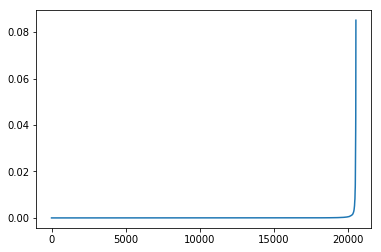

In [6]:
#plot the variance

plt.plot(sorted(var_genes))

In [7]:
#sorted the variance and finding the top 10 variance
sorted_var_genes=sorted(var_genes)
sorted_var_genes[-10:]

[0.04659080245779143,
 0.04819605959956769,
 0.05498793362196933,
 0.0563495046234589,
 0.059889116449379144,
 0.06181491027461705,
 0.0669308275434713,
 0.0809202686718989,
 0.08153949592794321,
 0.08509547007324843]

In [8]:
# Finding genes that has top 10 high variance
top_10_var_rna = normalized_rna[normalized_rna['Variance']>=0.04659080245779143]
#drop variance column
top_10_var_rna=top_10_var_rna.drop(columns=['Variance'])
# top 10 genes with the highest variance
top_10_var_rna


,,TCGA-3Z-A93Z-01,TCGA-6D-AA2E-01,TCGA-A3-3306-01,TCGA-A3-3307-01,TCGA-A3-3308-01,TCGA-A3-3311-01,TCGA-A3-3313-01,TCGA-A3-3316-01,TCGA-A3-3317-01,TCGA-A3-3319-01,...,TCGA-G6-A5PC-01,TCGA-G6-A8L6-01,TCGA-G6-A8L7-01,TCGA-G6-A8L8-01,TCGA-GK-A6C7-01,TCGA-MM-A563-01,TCGA-MM-A564-01,TCGA-MM-A84U-01,TCGA-MW-A4EC-01,TCGA-T7-A92I-01
Hugo_Symbol,Entrez_Gene_Id,,,,,,,,,,,,,,,,,,,,,
B2M,567,0.708975,0.152720,0.432670,1.000000,0.348842,0.638957,0.245929,0.123873,0.929998,0.168179,...,0.190390,0.374692,0.054107,0.317745,0.646431,0.784646,0.352459,0.467849,0.637432,0.190322
CD74,972,0.943024,0.161366,0.292585,0.758845,0.299597,0.676343,0.199456,0.182004,0.741500,0.267427,...,0.907686,0.565340,0.058526,0.191392,0.435163,1.000000,0.201396,0.623748,0.403746,0.100193
EEF1A1L14,1915,1.000000,0.246886,0.843086,0.984679,0.719813,1.000000,0.486727,0.228908,0.794989,0.170827,...,0.419683,0.852481,0.093803,0.952157,0.764597,0.580295,1.000000,0.589061,0.924961,0.115640
GAPDH,2597,0.703553,0.180639,0.708456,0.554339,0.603776,0.887926,0.322620,0.226245,0.611401,1.000000,...,0.992202,0.844401,0.786062,0.680574,0.332200,0.568032,0.902790,1.000000,1.000000,0.046888
GPX3,2878,0.602352,1.000000,0.359906,0.422273,0.107657,0.216079,0.491550,0.082877,0.139488,0.243083,...,1.000000,0.190708,0.018244,0.373232,0.199410,0.189243,0.135501,0.552506,0.533298,1.000000
IGFBP3,3486,0.560877,0.008519,0.451710,0.556137,0.216174,0.358340,0.049048,0.176405,1.000000,0.230149,...,0.203849,0.448015,1.000000,1.000000,0.578943,0.369504,0.331421,0.179801,0.278957,0.002641
LOC100505773,8490,0.394958,0.013318,0.049267,0.626977,0.293265,0.404004,0.116292,0.078315,0.685882,0.014562,...,0.038259,0.242159,0.015071,0.239772,0.472643,0.224027,0.499039,0.246000,0.412352,0.003028
SPARC,6678,0.595241,0.047702,0.145734,0.479518,0.607240,0.334396,0.193572,0.159751,0.860639,0.071445,...,0.039221,0.353875,0.049957,0.389707,0.658118,0.560251,0.502266,0.312222,0.368173,0.062861
TGFBI,7045,0.015777,0.004273,0.013128,0.016896,0.510706,0.297440,0.010118,1.000000,0.046165,0.283127,...,0.007228,0.032222,0.034522,0.002703,0.008451,0.112634,0.330039,0.111396,0.012706,0.001578


In [9]:
top_10_var_rna = top_10_var_rna.reset_index(level='Entrez_Gene_Id', drop=True)
rna_top10 = top_10_var_rna.T
patient_id_rna = rna_top10.index

In [10]:
dic_patient_id = {id_:id_[:-3] for id_ in patient_id_rna}
rna_top10 = rna_top10.rename(dic_patient_id, axis='index')

In [11]:
def read_clinical_file(location, name_file):
    """
    input location: string, location of the file
    input name_file:string, name of the clinical file
    This file is tab seperated and includes the column of 'PATIENT_ID' in the 5th row
    Out put: panda data frame
    function: read the file, skip first four rows, and set 'PATIENT_ID' as index
    """

    import pandas as pd
    
    clinical_file_path = location + name_file
    try:
        clinical_data = pd.read_csv(clinical_file_path,  sep='\t', skiprows=4)
        
        # make first the column PATIENT_ID as indexx of data frame 
        clinical_data =  clinical_data.set_index([ 'PATIENT_ID']) 
        
    except:
        print("***************")
        print("the location of file is not correct, or the column '#Patient Identifier' does not exist")
        print("***************")
    
    return clinical_data

In [12]:
clinical_data = read_clinical_file(location_of_data, clinical_file_name)
patients_clinical = clinical_data.index.values
patients_rna = rna_top10.index.values
#clean the duplicate patients in the data frame 
patients_in_clinical_notin_rna = [patient for patient in patients_clinical if patient not in patients_rna]
clinical_data = clinical_data.drop(index= patients_in_clinical_notin_rna)

rna_top10= rna_top10[~rna_top10.index.duplicated(keep='first')]
#concat clinical data and top10 rna data
clinical_data = pd.concat([clinical_data, rna_top10], axis=1, sort=False)
clinical_data.head()


,OTHER_PATIENT_ID,FORM_COMPLETION_DATE,HISTOLOGICAL_DIAGNOSIS,GRADE,LATERALITY,PROSPECTIVE_COLLECTION,RETROSPECTIVE_COLLECTION,SEX,DAYS_TO_BIRTH,RACE,...,B2M,CD74,EEF1A1L14,GAPDH,GPX3,IGFBP3,LOC100505773,SPARC,TGFBI,VIM
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-3Z-A93Z,2B1DEA0A-6D55-4FDD-9C1C-0D9FBE03BD78,11/11/14,Kidney Clear Cell Renal Carcinoma,G2,Right,YES,NO,Male,-25205,BLACK OR AFRICAN AMERICAN,...,0.708975,0.943024,1.000000,0.703553,0.602352,0.560877,0.394958,0.595241,0.015777,0.526250
TCGA-6D-AA2E,D3B47E53-6F40-4FC8-B5A4-CBE548A770A9,3/17/14,Kidney Clear Cell Renal Carcinoma,G2,Right,YES,NO,Female,-25043,BLACK OR AFRICAN AMERICAN,...,0.152720,0.161366,0.246886,0.180639,1.000000,0.008519,0.013318,0.047702,0.004273,0.111043
TCGA-A3-3306,9fb55e0b-43d8-40a3-8ef2-d198e6290551,8/23/10,Kidney Clear Cell Renal Carcinoma,G3,Left,NO,YES,Male,-24569,WHITE,...,0.432670,0.292585,0.843086,0.708456,0.359906,0.451710,0.049267,0.145734,0.013128,0.595353
TCGA-A3-3307,7ac1d6c6-9ade-49af-8794-10b5b96b2b05,4/13/10,Kidney Clear Cell Renal Carcinoma,G3,Right,NO,YES,Male,-24315,[Not Available],...,1.000000,0.758845,0.984679,0.554339,0.422273,0.556137,0.626977,0.479518,0.016896,0.541308
TCGA-A3-3308,3cbca837-f5a7-4a87-8f02-c59eac232d5a,4/12/10,Kidney Clear Cell Renal Carcinoma,G2,Right,NO,YES,Female,-28287,WHITE,...,0.348842,0.299597,0.719813,0.603776,0.107657,0.216174,0.293265,0.607240,0.510706,0.542034


In [13]:
#save the clinical data as csv file to use in other code documents
clinical_data.to_csv('clinical data.csv')

Text(0.5, 0, 'genes')

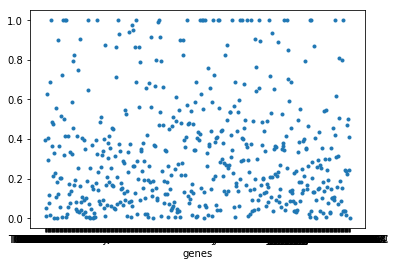

In [14]:
#see the RGS5 gene distribution
plt.plot(clinical_data['LOC100505773'],linestyle='',marker ='.')

plt.xlabel('genes')



In [15]:
#we choose 0.1 level for divide the RGS5 gene expression high and low.
clinical_data.loc[(clinical_data['LOC100505773']>0.1),'RGS5 level']='high RGS5'
clinical_data.loc[(clinical_data['LOC100505773']<=0.1),'RGS5 level']='low RGS5'
clinical_data['RGS5 level'].value_counts()

high RGS5    404
low RGS5     129
Name: RGS5 level, dtype: int64

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

low RGS5 v.s. high RGS5: MWW RankSum two-sided P_val=1.818e-02 U_stat=2.246e+04


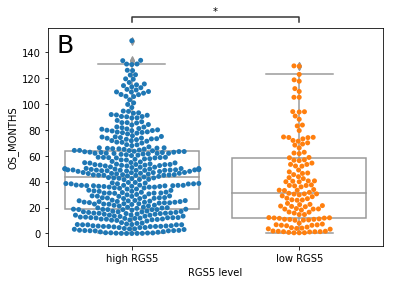

In [16]:
#graph of low and high RGS5 level and survival months  

ax=sns.boxplot(x='RGS5 level', y='OS_MONTHS', data=clinical_data, order=['high RGS5','low RGS5'],color='w')

sns.swarmplot(x='RGS5 level', y='OS_MONTHS', data=clinical_data,order=['high RGS5','low RGS5'])
plt.xticks(rotation=0)
#adding statistical values on the graph
add_stat_annotation(ax, data=clinical_data, x='RGS5 level', y='OS_MONTHS',order=['high RGS5','low RGS5'],
                boxPairList=[('low RGS5','high RGS5')], test='Mann-Whitney', textFormat='star', loc='outside', 
verbose=2)
plt.text(-0.45,140,"B", fontsize=25)
plt.savefig('RGS5_level.eps', format='eps',bbox_inches='tight', dpi=1000)

plt.show()

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

G2_low RGS5 v.s. G2_high RGS5: MWW RankSum two-sided P_val=7.401e-02 U_stat=2.530e+03
G4_low RGS5 v.s. G4_high RGS5: MWW RankSum two-sided P_val=3.545e-01 U_stat=6.155e+02
G3_low RGS5 v.s. G3_high RGS5: MWW RankSum two-sided P_val=2.993e-01 U_stat=3.934e+03
pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

G2 v.s. G3: MWW RankSum two-sided P_val=5.813e-01 U_stat=2.431e+04
G3 v.s. G4: MWW RankSum two-sided P_val=6.250e-03 U_stat=9.490e+03


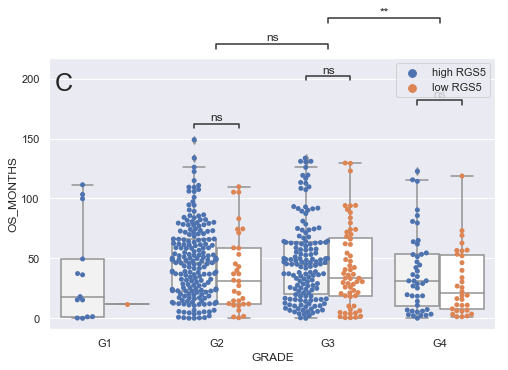

In [17]:
#graph of low and high RGS5 level and grade of tumor 


sns.set(rc={'figure.figsize':(8,5)})
   
ax=sns.boxplot(x='GRADE', y='OS_MONTHS', data=clinical_data, order=['G1','G2','G3','G4'],hue='RGS5 level',color='w')

sns.swarmplot(x='GRADE', y='OS_MONTHS', data=clinical_data, order=['G1','G2','G3','G4'],hue='RGS5 level',dodge=True)
plt.xticks(rotation=0)


#adding statistical values on the graph

add_stat_annotation(ax, data=clinical_data, x='GRADE', y='OS_MONTHS',order=['G1','G2','G3','G4'],hue='RGS5 level',
                boxPairList=[(('G2','low RGS5'),('G2', 'high RGS5')), (('G4','low RGS5'),('G4', 'high RGS5')),
                             (('G3','low RGS5'),('G3', 'high RGS5'))],
                    test='Mann-Whitney', textFormat='star', loc='inside', 
verbose=2)
add_stat_annotation(ax, data=clinical_data, x='GRADE', y='OS_MONTHS',order=['G1','G2','G3','G4'],
                boxPairList=[('G2','G3'),('G3','G4')],
                    test='Mann-Whitney', textFormat='star', loc='outside', 
verbose=2)

handles, labels = ax.get_legend_handles_labels()

l = plt.legend(handles[2:], labels[2:])

plt.text(-0.45,190,"C", fontsize=25)
plt.savefig('grade_RGS5.eps', format='eps',bbox_inches='tight', dpi=1000)

plt.show()


/Users/sumeyyesu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


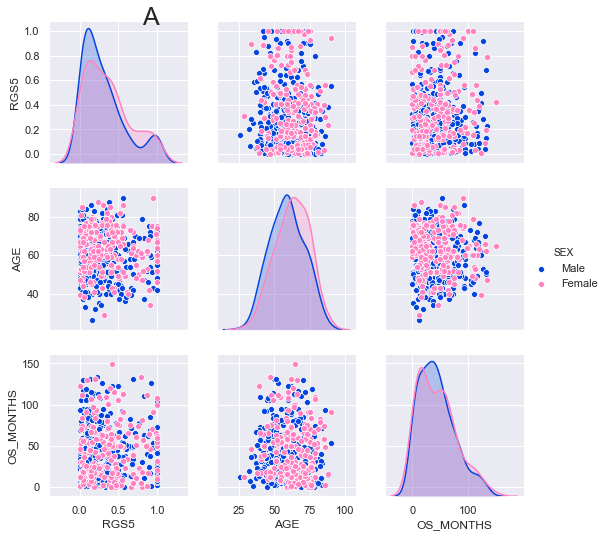

In [18]:
#change the gene name 
clinical_data['RGS5']=clinical_data['LOC100505773']
#correlation graph of RGS5 gene, survival month, and age of patients
palette={"Male":"#0343df", "Female":"#ff81c0"}
sns.pairplot(clinical_data[['RGS5','AGE','OS_MONTHS','SEX']],hue='SEX',palette=palette)
plt.text(-480,180,"A", fontsize=25)

plt.savefig('pairplot.eps', format='eps',bbox_inches='tight', dpi=1000)


pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Male v.s. Female: MWW RankSum two-sided P_val=3.828e-02 U_stat=2.891e+04


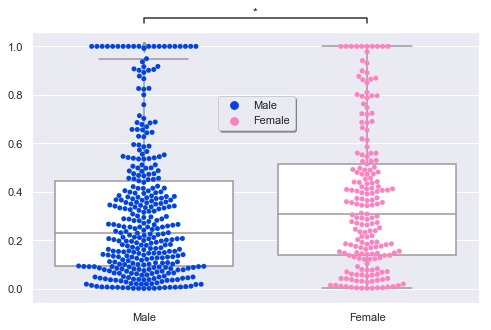

In [19]:

# Compression of expression of level of RGS5 gene by gender
sns.set(rc={'figure.figsize':(8,5)})
 
ax=sns.boxplot(x='SEX', y='LOC100505773', data=clinical_data,color='w')
palette={"Male":"#0343df", "Female":"#ff81c0"}
sns.swarmplot(x='SEX', y='LOC100505773', data=clinical_data,hue='SEX', palette=palette)
plt.xticks(rotation=0)

ax.legend(loc='right', bbox_to_anchor=(0.6,0.7),
          fancybox=True, shadow=True, ncol=1)
#adding statistical values on the graph
add_stat_annotation(ax, data=clinical_data, x='SEX', y='LOC100505773',
                boxPairList=[("Male", "Female")], test='Mann-Whitney', textFormat='star', loc='outside', 
verbose=2)
plt.xlabel('')
plt.ylabel('')
plt.savefig('gender.eps', format='eps',bbox_inches='tight', dpi=1000)
plt.show()


In [20]:
#combining sub-stages of TNM stage ( expample:for T1a and T1b only T1)

clinical_data.loc[((clinical_data['AJCC_TUMOR_PATHOLOGIC_PT']=='T1') |(clinical_data['AJCC_TUMOR_PATHOLOGIC_PT']=='T1a')|(clinical_data['AJCC_TUMOR_PATHOLOGIC_PT']=='T1b')), 'TUMOR_PATH']='T 1'
clinical_data.loc[((clinical_data['AJCC_TUMOR_PATHOLOGIC_PT']=='T2') |(clinical_data['AJCC_TUMOR_PATHOLOGIC_PT']=='T2a')|(clinical_data['AJCC_TUMOR_PATHOLOGIC_PT']=='T2b')), 'TUMOR_PATH']='T 2'
clinical_data.loc[((clinical_data['AJCC_TUMOR_PATHOLOGIC_PT']=='T3') |(clinical_data['AJCC_TUMOR_PATHOLOGIC_PT']=='T3a')|(clinical_data['AJCC_TUMOR_PATHOLOGIC_PT']=='T3b')|(clinical_data['AJCC_TUMOR_PATHOLOGIC_PT']=='T3c')), 'TUMOR_PATH']='T 3'
clinical_data.loc[((clinical_data['AJCC_TUMOR_PATHOLOGIC_PT']=='T4')), 'TUMOR_PATH']='T 4'
#number of patients in each stage
clinical_data['TUMOR_PATH'].value_counts()

T 1    273
T 3    180
T 2     69
T 4     11
Name: TUMOR_PATH, dtype: int64

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

T 1 v.s. T 3: MWW RankSum two-sided P_val=3.097e-05 U_stat=3.025e+04
T 2 v.s. T 1: MWW RankSum two-sided P_val=3.823e-04 U_stat=6.812e+03
T 2 v.s. T 3: MWW RankSum two-sided P_val=2.943e-01 U_stat=5.676e+03
T 3 v.s. T 4: MWW RankSum two-sided P_val=4.599e-04 U_stat=1.614e+03


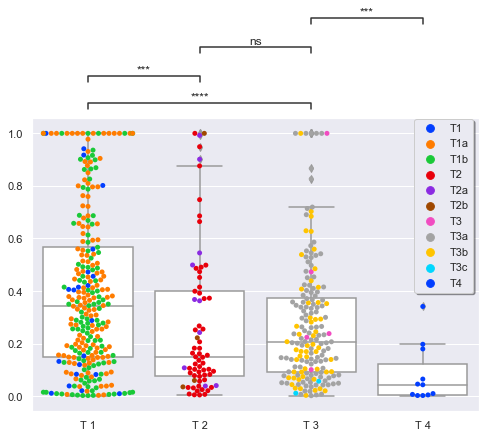

In [21]:
# Compression of expression of level of RGS5 gene by TNM stage
sns.set(rc={'figure.figsize':(8,6)})
   
ax=sns.boxplot(x='TUMOR_PATH', y='LOC100505773', data=clinical_data, order=['T 1','T 2','T 3','T 4'],color='w')
#use sub-TNM stages for hue
sns.swarmplot(x='TUMOR_PATH', y='LOC100505773', data=clinical_data, order=['T 1','T 2','T 3','T 4'],hue= "AJCC_TUMOR_PATHOLOGIC_PT",hue_order=['T1','T1a','T1b','T2','T2a','T2b','T3','T3a','T3b','T3c','T4'],palette="bright")
plt.xticks(rotation=0)

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

ax.legend(loc='right', bbox_to_anchor=(1,0.7),
          fancybox=True, shadow=True, ncol=1)


#adding statistical values on the graph
add_stat_annotation(ax, data=clinical_data, x='TUMOR_PATH', y='LOC100505773',order=['T 1','T 2','T 3','T 4'],
                boxPairList=[('T 1','T 3'),('T 2','T 1'),('T 2','T 3'),('T 3','T 4')], test='Mann-Whitney', textFormat='star', loc='outside', 
verbose=2)
plt.xlabel('')
plt.ylabel('')
plt.savefig('tumor_path.eps', format='eps',bbox_inches='tight', dpi=1000)
plt.show()

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

G2 v.s. G3: MWW RankSum two-sided P_val=4.802e-07 U_stat=3.018e+04
G3 v.s. G4: MWW RankSum two-sided P_val=1.624e-03 U_stat=9.744e+03


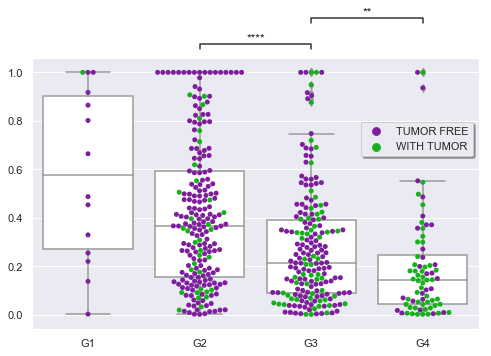

In [22]:
# Compression of expression of level of RGS5 gene by grade of tumor

sns.set(rc={'figure.figsize':(8,5)})
   
ax=sns.boxplot(x='GRADE', y='LOC100505773', data=clinical_data, order=['G1','G2','G3','G4'],color='w')
palette={"TUMOR FREE":"#7e1e9c","WITH TUMOR":"#15b01a"}
#use tumor status for hue
sns.swarmplot(x='GRADE', y='LOC100505773', data=clinical_data, order=['G1','G2','G3','G4'],hue='TUMOR_STATUS',hue_order=['TUMOR FREE','WITH TUMOR'],palette=palette)
plt.xticks(rotation=0)



# Put a legend below current axis
ax.legend(loc='right', bbox_to_anchor=(1,0.7),
          fancybox=True, shadow=True, ncol=1)
#adding statistical values on the graph
add_stat_annotation(ax, data=clinical_data, x='GRADE', y='LOC100505773',order=['G1','G2','G3','G4'],
                boxPairList=[('G2','G3'),('G3','G4')], test='Mann-Whitney', textFormat='star', loc='outside', 
verbose=2)
plt.xlabel('')
plt.ylabel('')
plt.savefig('grade.eps', format='eps',bbox_inches='tight', dpi=1000)
plt.show()


In [67]:
#number of patients in each grade
clinical_data['GRADE'].value_counts()

G2                 229
G3                 206
G4                  76
G1                  14
GX                   5
[Not Available]      3
Name: GRADE, dtype: int64

In [70]:
#create a new column(SERUM_WBC) depends on serum cal level and wbc level
clinical_data.loc[((clinical_data['SERUM_CALCIUM_LEVEL']=='Low') &(clinical_data['WBC']=='Elevated')), 'SERUM_WBC']='LowCal,EleWbc'
clinical_data.loc[((clinical_data['SERUM_CALCIUM_LEVEL']=='Low') &(clinical_data['WBC']=='Normal')),'SERUM_WBC']='Lowcal,NorWbc'
clinical_data.loc[((clinical_data['SERUM_CALCIUM_LEVEL']=='Normal') &(clinical_data['WBC']=='Elevated')),'SERUM_WBC']='NorCal,EleWbc'
clinical_data.loc[((clinical_data['SERUM_CALCIUM_LEVEL']=='Normal') &(clinical_data['WBC']=='Normal')),'SERUM_WBC']='NorCal,NorWbc'
#number of patients in each group
clinical_data['SERUM_WBC'].value_counts()

LowCal,EleWbc    127
NorCal,NorWbc    106
Lowcal,NorWbc     73
NorCal,EleWbc     29
Name: SERUM_WBC, dtype: int64

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

NorCal,NorWbc v.s. Lowcal,NorWbc: MWW RankSum two-sided P_val=6.420e-02 U_stat=3.238e+03
LowCal,EleWbc v.s. NorCal,NorWbc: MWW RankSum two-sided P_val=9.834e-03 U_stat=8.054e+03
NorCal,EleWbc v.s. LowCal,EleWbc: MWW RankSum two-sided P_val=5.385e-01 U_stat=1.706e+03
NorCal,EleWbc v.s. Lowcal,NorWbc: MWW RankSum two-sided P_val=6.670e-01 U_stat=1.000e+03
Lowcal,NorWbc v.s. LowCal,EleWbc: MWW RankSum two-sided P_val=7.820e-01 U_stat=4.526e+03


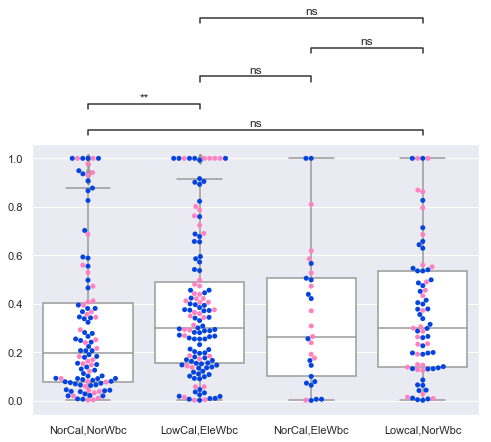

In [69]:
# Compression of expression of level of RGS5 gene by grade of serum_wbc

sns.set(rc={'figure.figsize':(8,5)})
   
ax=sns.boxplot(x='SERUM_WBC', y='LOC100505773', data=clinical_data,color='w')
palette={"Male":"#0343df", "Female":"#ff81c0"}
#use gender for hue
sns.swarmplot(x='SERUM_WBC', y='LOC100505773',data=clinical_data, hue=clinical_data['SEX'],palette=palette)
plt.xticks(rotation=0)
ax.get_legend().remove()
#adding statistical values on the graph
add_stat_annotation(ax, data=clinical_data, x='SERUM_WBC', y='LOC100505773',
                boxPairList=[('NorCal,NorWbc','Lowcal,NorWbc'),('LowCal,EleWbc','NorCal,NorWbc'),('NorCal,EleWbc','LowCal,EleWbc'),('NorCal,EleWbc','Lowcal,NorWbc'),('Lowcal,NorWbc','LowCal,EleWbc')], test='Mann-Whitney', textFormat='star', loc='outside', 
verbose=2)
plt.xlabel('')
plt.ylabel('')
plt.savefig('serum_wbc.eps', format='eps',bbox_inches='tight', dpi=1000)
plt.show()

In [72]:
#create a new column(SERUM_SEX) depends on serum cal level and gender

clinical_data.loc[((clinical_data['SERUM_CALCIUM_LEVEL']=='Low') &(clinical_data['SEX']=='Female')), 'SERUM_SEX']='Low in Female'
clinical_data.loc[((clinical_data['SERUM_CALCIUM_LEVEL']=='Low') &(clinical_data['SEX']=='Male')), 'SERUM_SEX']='Low in Male'
clinical_data.loc[((clinical_data['SERUM_CALCIUM_LEVEL']=='Normal') &(clinical_data['SEX']=='Female')), 'SERUM_SEX']='Normal in Female'
clinical_data.loc[((clinical_data['SERUM_CALCIUM_LEVEL']=='Normal') &(clinical_data['SEX']=='Male')), 'SERUM_SEX']='Normal in Male'
#number of patients in each group
clinical_data['SERUM_SEX'].value_counts()




Low in Male         137
Normal in Male       95
Low in Female        67
Normal in Female     55
Name: SERUM_SEX, dtype: int64

In [74]:
#create a new column(SERUM_LATERALITY) depends on serum cal level and laterality

clinical_data.loc[((clinical_data['SERUM_CALCIUM_LEVEL']=='Low') &(clinical_data['LATERALITY']=='Right')), 'SERUM_LATERALITY']='Low in Right'
clinical_data.loc[((clinical_data['SERUM_CALCIUM_LEVEL']=='Low') &(clinical_data['LATERALITY']=='Left')),'SERUM_LATERALITY']='Low in Left'
clinical_data.loc[((clinical_data['SERUM_CALCIUM_LEVEL']=='Normal') &(clinical_data['LATERALITY']=='Right')),'SERUM_LATERALITY']='Normal in Right'
clinical_data.loc[((clinical_data['SERUM_CALCIUM_LEVEL']=='Normal') &(clinical_data['LATERALITY']=='Left')),'SERUM_LATERALITY']='Normal in Left'
#number of patients in each group
clinical_data['SERUM_LATERALITY'].value_counts()


Low in Right       117
Low in Left         87
Normal in Left      76
Normal in Right     74
Name: SERUM_LATERALITY, dtype: int64

In [73]:
#create a new column(SERUM_OS) depends on serum cal level and survival status
clinical_data.loc[((clinical_data['SERUM_CALCIUM_LEVEL']=='Low') &(clinical_data['OS_STATUS']=='LIVING')), 'SERUM_OS']='Living Low'
clinical_data.loc[((clinical_data['SERUM_CALCIUM_LEVEL']=='Low') &(clinical_data['OS_STATUS']=='DECEASED')), 'SERUM_OS']='Deceased Low'
clinical_data.loc[((clinical_data['SERUM_CALCIUM_LEVEL']=='Normal') &(clinical_data['OS_STATUS']=='LIVING')), 'SERUM_OS']='Living Normal'
clinical_data.loc[((clinical_data['SERUM_CALCIUM_LEVEL']=='Normal') &(clinical_data['OS_STATUS']=='DECEASED')), 'SERUM_OS']='Deceased Normal'
#number of patients in each group
clinical_data['SERUM_OS'].value_counts()


Living Low         138
Living Normal       89
Deceased Low        66
Deceased Normal     61
Name: SERUM_OS, dtype: int64

In [78]:
#create a new column(SERUM_LATERALITY) depends on serum cal level and tumor status

clinical_data.loc[((clinical_data['TUMOR_STATUS']=='TUMOR FREE') &(clinical_data['SERUM_CALCIUM_LEVEL']=='Low')), 'TUMOR_SERUM']='Tumor Free, Low'
clinical_data.loc[((clinical_data['TUMOR_STATUS']=='WITH TUMOR') &(clinical_data['SERUM_CALCIUM_LEVEL']=='Low')),'TUMOR_SERUM']='With Tumor, Low'
clinical_data.loc[((clinical_data['TUMOR_STATUS']=='TUMOR FREE') &(clinical_data['SERUM_CALCIUM_LEVEL']=='Normal')),'TUMOR_SERUM']='Tumor Free, Normal'
clinical_data.loc[((clinical_data['TUMOR_STATUS']=='WITH TUMOR') &(clinical_data['SERUM_CALCIUM_LEVEL']=='Normal')),'TUMOR_SERUM']='With Tumor, Normal'
#number of patients in each group

clinical_data['TUMOR_SERUM'].value_counts()

Tumor Free, Low       146
Tumor Free, Normal     93
With Tumor, Normal     52
With Tumor, Low        45
Name: TUMOR_SERUM, dtype: int64

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Low v.s. Normal: MWW RankSum two-sided P_val=8.062e-03 U_stat=1.782e+04


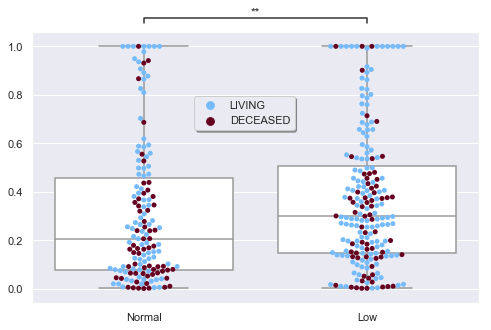

In [26]:
# Compression of expression of level of RGS5 gene by grade of serum_os

sns.set(rc={'figure.figsize':(8,5)})
   
ax=sns.boxplot(x='SERUM_CALCIUM_LEVEL', y='LOC100505773', data=clinical_data,order=['Normal','Low'],color='w')
palette={'LIVING':'#75bbfd','DECEASED':'#650021'}
sns.swarmplot(x='SERUM_CALCIUM_LEVEL', y='LOC100505773',data=clinical_data,order=['Normal','Low'],hue='OS_STATUS',palette=palette)
plt.xticks(rotation=0)

ax.legend(loc='right', bbox_to_anchor=(0.6,0.7),
          fancybox=True, shadow=True, ncol=1)

#adding statistical values on the graph
add_stat_annotation(ax, data=clinical_data, x='SERUM_CALCIUM_LEVEL', y='LOC100505773',order=['Normal','Low'],
                boxPairList=[('Low','Normal')], test='Mann-Whitney', textFormat='star', loc='outside', 
verbose=2)
plt.xlabel('')
plt.ylabel('')
plt.savefig('serum_os.eps', format='eps',bbox_inches='tight', dpi=1000)
plt.show()

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Normal in Right v.s. Normal in Left: MWW RankSum two-sided P_val=9.595e-01 U_stat=2.826e+03
Low in Right v.s. Normal in Right: MWW RankSum two-sided P_val=4.456e-02 U_stat=5.077e+03
Low in Left v.s. Low in Right: MWW RankSum two-sided P_val=8.272e-01 U_stat=4.998e+03
Low in Left v.s. Normal in Left: MWW RankSum two-sided P_val=8.275e-02 U_stat=3.828e+03


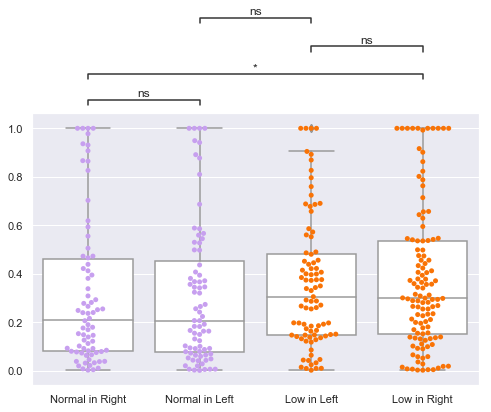

In [76]:
# Compression of expression of level of RGS5 gene by grade of serum_laterality

sns.set(rc={'figure.figsize':(8,5)})
   
ax=sns.boxplot(x='SERUM_LATERALITY', y='LOC100505773', data=clinical_data,color='w')
palette={"Normal in Right":'#c79fef','Low in Right':'#f97306','Normal in Left':'#c79fef','Low in Left':'#f97306'}
sns.swarmplot(x='SERUM_LATERALITY', y='LOC100505773', data=clinical_data,palette=palette)
plt.xticks(rotation=0)
#adding statistical values on the graph
add_stat_annotation(ax, data=clinical_data, x='SERUM_LATERALITY', y='LOC100505773',
                boxPairList=[('Normal in Right','Normal in Left'),('Low in Right','Normal in Right'),('Low in Left','Low in Right'),('Low in Left','Normal in Left')], test='Mann-Whitney', textFormat='star', loc='outside', 
verbose=2)
plt.xlabel('')
plt.ylabel('')
plt.savefig('serum_later.eps', format='eps',bbox_inches='tight', dpi=1000)
plt.show()

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Low in Male v.s. Normal in Male: MWW RankSum two-sided P_val=9.426e-03 U_stat=7.813e+03
Normal in Male v.s. Normal in Female: MWW RankSum two-sided P_val=1.197e-01 U_stat=2.213e+03
Low in Female v.s. Low in Male: MWW RankSum two-sided P_val=1.188e-01 U_stat=5.208e+03
Normal in Female v.s. Low in Female: MWW RankSum two-sided P_val=2.168e-01 U_stat=1.602e+03


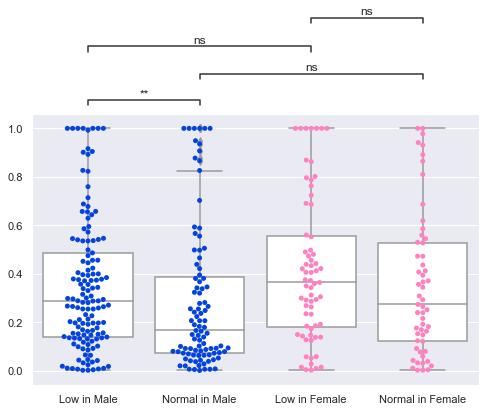

In [77]:
# Compression of expression of level of RGS5 gene by grade of serum_gender

sns.set(rc={'figure.figsize':(8,5)})
   
ax=sns.boxplot(x='SERUM_SEX', y='LOC100505773', data=clinical_data,color='w',order=['Low in Male','Normal in Male','Low in Female','Normal in Female'])
palette={"Low in Male":"#0343df", "Normal in Male":"#0343df",'Normal in Female':"#ff81c0",'Low in Female':"#ff81c0"}
sns.swarmplot(x='SERUM_SEX', y='LOC100505773', data=clinical_data,order=['Low in Male','Normal in Male','Low in Female','Normal in Female'],palette=palette)
plt.xticks(rotation=0)
#adding statistical values on the graph
add_stat_annotation(ax, data=clinical_data, x='SERUM_SEX', y='LOC100505773',order=['Low in Male','Normal in Male','Low in Female','Normal in Female'],
                boxPairList=[('Low in Male','Normal in Male'),('Normal in Male','Normal in Female'),('Low in Female','Low in Male'),('Normal in Female','Low in Female')], test='Mann-Whitney', textFormat='star', loc='outside', 
verbose=2)
plt.xlabel('')
plt.ylabel('')
plt.savefig('serum_gender.eps', format='eps',bbox_inches='tight', dpi=1000)
plt.show()

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Tumor Free, Normal v.s. With Tumor, Normal: MWW RankSum two-sided P_val=3.604e-02 U_stat=2.927e+03
Tumor Free, Low v.s. With Tumor, Low: MWW RankSum two-sided P_val=1.475e-01 U_stat=3.755e+03
Tumor Free, Normal v.s. Tumor Free, Low: MWW RankSum two-sided P_val=1.317e-01 U_stat=6.003e+03
With Tumor, Normal v.s. With Tumor, Low: MWW RankSum two-sided P_val=1.573e-01 U_stat=9.740e+02


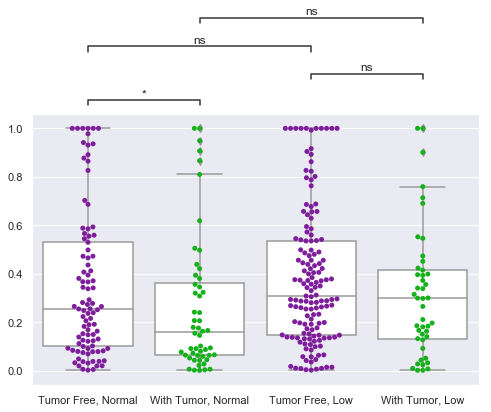

In [79]:
# Compression of expression of level of RGS5 gene by tumor_serum

sns.set(rc={'figure.figsize':(8,5)})
   
ax=sns.boxplot(x='TUMOR_SERUM', y='LOC100505773', data=clinical_data, order=['Tumor Free, Normal','With Tumor, Normal','Tumor Free, Low','With Tumor, Low'],color='w')
palette={"Tumor Free, Normal":"#7e1e9c","With Tumor, Normal":"#15b01a",'With Tumor, Low':"#15b01a",'Tumor Free, Low':"#7e1e9c"}
sns.swarmplot(x='TUMOR_SERUM', y='LOC100505773', data=clinical_data,order=['Tumor Free, Normal','With Tumor, Normal','Tumor Free, Low','With Tumor, Low'],palette=palette)
plt.xticks(rotation=0)
#adding statistical values on the graph
add_stat_annotation(ax, data=clinical_data, x='TUMOR_SERUM', y='LOC100505773',order=['Tumor Free, Normal','With Tumor, Normal','Tumor Free, Low','With Tumor, Low'],
                boxPairList=[('Tumor Free, Normal','With Tumor, Normal'),('Tumor Free, Low','With Tumor, Low'),('Tumor Free, Normal','Tumor Free, Low'),('With Tumor, Normal','With Tumor, Low')], test='Mann-Whitney', textFormat='star', loc='outside', 
verbose=2)

plt.xlabel('')
plt.ylabel('')
plt.savefig('serum_tumor.eps', format='eps',bbox_inches='tight', dpi=1000)
plt.show()

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

DiseaseFree v.s. Recurred/Progressed: MWW RankSum two-sided P_val=6.223e-03 U_stat=2.272e+04


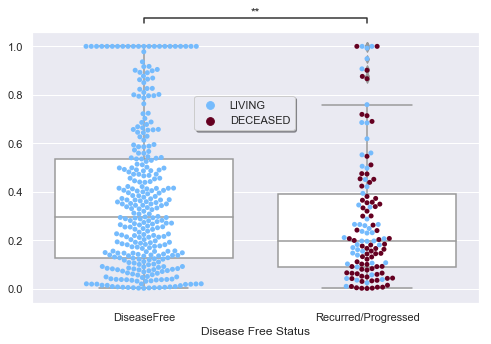

In [80]:
# Compression of expression of level of RGS5 gene by disease free status

sns.set(rc={'figure.figsize':(8,5)})
   
ax=sns.boxplot(x='DFS_STATUS', y='LOC100505773', data=clinical_data, order=['DiseaseFree','Recurred/Progressed'],color='w')
palette={'LIVING':'#75bbfd','DECEASED':'#650021'}
#choose survival staus for hue
sns.swarmplot(x='DFS_STATUS', y='LOC100505773', data=clinical_data,order=['DiseaseFree','Recurred/Progressed'],hue='OS_STATUS',palette=palette)
plt.xticks(rotation=0)


ax.legend(loc='right', bbox_to_anchor=(0.6,0.7),
          fancybox=True, shadow=True, ncol=1)
#adding statistical values on the graph
add_stat_annotation(ax, data=clinical_data, x='DFS_STATUS', y='LOC100505773',order=['DiseaseFree','Recurred/Progressed'],
              boxPairList=[('DiseaseFree','Recurred/Progressed')], test='Mann-Whitney', textFormat='star', loc='outside', 
verbose=2)

plt.xlabel('Disease Free Status')
plt.ylabel('')
plt.savefig('disease_free.eps', format='eps',bbox_inches='tight', dpi=1000)
plt.show()


In [81]:
#number of patients in group of WBC
clinical_data['WBC'].value_counts()

Normal             267
Elevated           164
[Not Available]     94
Low                  8
Name: WBC, dtype: int64

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Elevated v.s. Normal: MWW RankSum two-sided P_val=2.270e-02 U_stat=2.476e+04


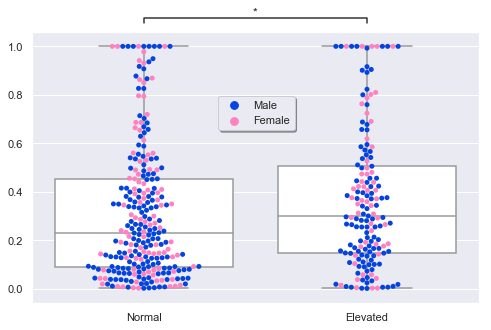

In [83]:
# Compression of expression of level of RGS5 gene by wbc


sns.set(rc={'figure.figsize':(8,5)})
   
ax=sns.boxplot(x='WBC', y='LOC100505773', data=clinical_data, order=['Normal','Elevated'],color='w')
palette={"Male":"#0343df", "Female":"#ff81c0"}
#use gender for hue
sns.swarmplot(x='WBC', y='LOC100505773', data=clinical_data, order=['Normal','Elevated'],hue=clinical_data['SEX'],palette=palette)
plt.xticks(rotation=0)
ax.legend(loc='right', bbox_to_anchor=(0.6,0.7),
          fancybox=True, shadow=True, ncol=1)
#adding statistical values on the graph
add_stat_annotation(ax, data=clinical_data, x='WBC', y='LOC100505773',order=['Normal','Elevated'],
                boxPairList=[('Elevated','Normal')], test='Mann-Whitney', textFormat='star', loc='outside', 
verbose=2)

plt.xlabel('')
plt.ylabel('')
plt.savefig('wbc.eps', format='eps',bbox_inches='tight', dpi=1000)
plt.show()

In [84]:
#create a new column(OS_WBC) depends on wbc and survival status

clinical_data.loc[((clinical_data['OS_STATUS']=='LIVING') &(clinical_data['WBC']=='Elevated')), 'OS_WBC']='Living,Elevated'
clinical_data.loc[((clinical_data['OS_STATUS']=='LIVING') &(clinical_data['WBC']=='Normal')), 'OS_WBC']='Living,Normal'
clinical_data.loc[((clinical_data['OS_STATUS']=='DECEASED') &(clinical_data['WBC']=='Elevated')), 'OS_WBC']='Deceased,Elevated'

clinical_data.loc[((clinical_data['OS_STATUS']=='DECEASED') &(clinical_data['WBC']=='Normal')), 'OS_WBC']='Deceased,Normal'
#number of patients in each group

clinical_data['OS_WBC'].value_counts()



Living,Normal        164
Living,Elevated      118
Deceased,Normal      103
Deceased,Elevated     46
Name: OS_WBC, dtype: int64

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Living,Normal v.s. Deceased,Normal: MWW RankSum two-sided P_val=2.156e-04 U_stat=1.072e+04
Deceased,Normal v.s. Deceased,Elevated: MWW RankSum two-sided P_val=1.331e-01 U_stat=2.003e+03
Living,Normal v.s. Living,Elevated: MWW RankSum two-sided P_val=2.473e-01 U_stat=8.894e+03
Living,Elevated v.s. Deceased,Elevated: MWW RankSum two-sided P_val=6.501e-02 U_stat=3.218e+03


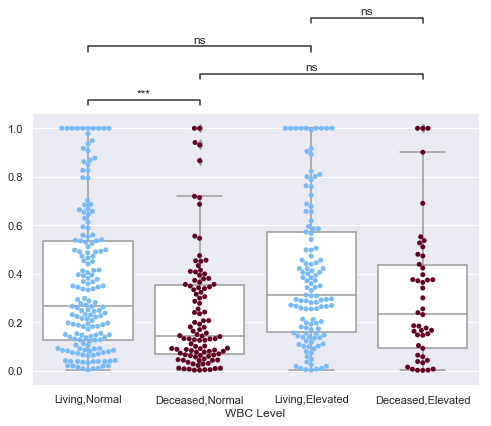

In [86]:
# Compression of expression of level of RGS5 gene by os_wbc
sns.set(rc={'figure.figsize':(8,5)})
   
ax=sns.boxplot(x='OS_WBC', y='LOC100505773', data=clinical_data, order=['Living,Normal','Deceased,Normal','Living,Elevated','Deceased,Elevated'],color='w')
palette={'Living,Normal':'#75bbfd','Deceased,Normal':'#650021','Living,Elevated':'#75bbfd','Deceased,Elevated':'#650021'}



sns.swarmplot(x='OS_WBC', y='LOC100505773', data=clinical_data, order=['Living,Normal','Deceased,Normal','Living,Elevated','Deceased,Elevated'],palette=palette)
plt.xticks(rotation=0)
#adding statistical values on the graph
add_stat_annotation(ax, data=clinical_data, x='OS_WBC', y='LOC100505773',order=['Living,Normal','Deceased,Normal','Living,Elevated','Deceased,Elevated'],
                boxPairList=[('Living,Normal','Deceased,Normal'),('Deceased,Normal','Deceased,Elevated'),('Living,Normal','Living,Elevated'),('Living,Elevated','Deceased,Elevated')], test='Mann-Whitney', textFormat='star', loc='outside', 
verbose=2)

plt.xlabel('WBC Level')
plt.ylabel('')
plt.savefig('wbc_os.eps', format='eps',bbox_inches='tight', dpi=1000)
plt.show()

In [87]:
#create a new column(TUMOR_WBC) depends on wbc and tumor status

clinical_data.loc[((clinical_data['TUMOR_STATUS']=='TUMOR FREE') &(clinical_data['WBC']=='Elevated')), 'TUMOR_WBC']='Tumor Free, Elevated'
clinical_data.loc[((clinical_data['TUMOR_STATUS']=='WITH TUMOR') &(clinical_data['WBC']=='Elevated')),'TUMOR_WBC']='With Tumor, Elevated'
clinical_data.loc[((clinical_data['TUMOR_STATUS']=='TUMOR FREE') &(clinical_data['WBC']=='Normal')),'TUMOR_WBC']='Tumor Free, Normal'
clinical_data.loc[((clinical_data['TUMOR_STATUS']=='WITH TUMOR') &(clinical_data['WBC']=='Normal')),'TUMOR_WBC']='With Tumor, Normal'
#number of patients in each group

clinical_data['TUMOR_WBC'].value_counts()

Tumor Free, Normal      169
Tumor Free, Elevated    118
With Tumor, Normal       85
With Tumor, Elevated     38
Name: TUMOR_WBC, dtype: int64

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Tumor Free, Normal v.s. With Tumor, Normal: MWW RankSum two-sided P_val=2.142e-03 U_stat=8.879e+03
Tumor Free, Elevated v.s. With Tumor, Elevated: MWW RankSum two-sided P_val=1.884e-01 U_stat=2.561e+03
Tumor Free, Normal v.s. Tumor Free, Elevated: MWW RankSum two-sided P_val=2.626e-01 U_stat=9.196e+03
With Tumor, Normal v.s. With Tumor, Elevated: MWW RankSum two-sided P_val=2.253e-01 U_stat=1.393e+03


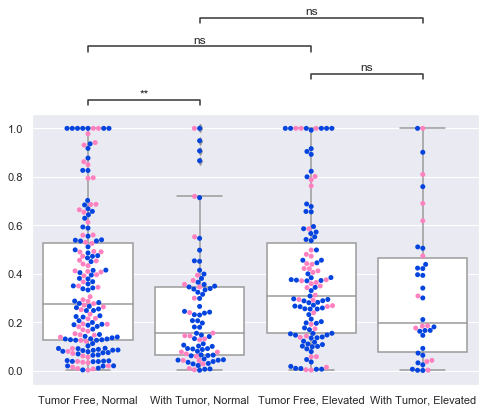

In [88]:
# Compression of expression of level of RGS5 gene by tumor_wbc

sns.set(rc={'figure.figsize':(8,5)})
   
ax=sns.boxplot(x='TUMOR_WBC', y='LOC100505773', data=clinical_data, order=['Tumor Free, Normal','With Tumor, Normal','Tumor Free, Elevated','With Tumor, Elevated'],color='w')
palette={"Male":"#0343df", "Female":"#ff81c0"}
#USE GENDER FOR HUE
sns.swarmplot(x='TUMOR_WBC', y='LOC100505773', data=clinical_data,order=['Tumor Free, Normal','With Tumor, Normal','Tumor Free, Elevated','With Tumor, Elevated'],hue=clinical_data['SEX'],palette=palette)
plt.xticks(rotation=0)

ax.get_legend().remove()
#adding statistical values on the graph
add_stat_annotation(ax, data=clinical_data, x='TUMOR_WBC', y='LOC100505773',order=['Tumor Free, Normal','With Tumor, Normal','Tumor Free, Elevated','With Tumor, Elevated'],
                boxPairList=[('Tumor Free, Normal','With Tumor, Normal'),('Tumor Free, Elevated','With Tumor, Elevated'),('Tumor Free, Normal','Tumor Free, Elevated'),('With Tumor, Normal','With Tumor, Elevated')], test='Mann-Whitney', textFormat='star', loc='outside', 
verbose=2)
plt.xlabel('')
plt.ylabel('')
plt.savefig('wbc_tumor.eps', format='eps',bbox_inches='tight', dpi=1000)
plt.show()

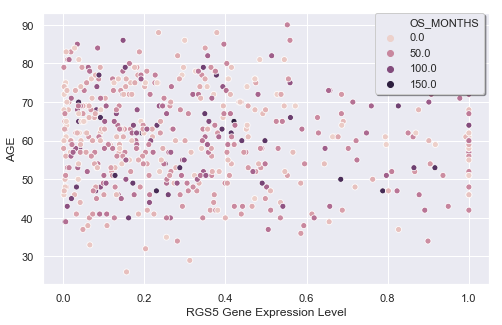

In [89]:
#correlation grapgh of RGS5 gene expression level and age of patients with using survival months for hue
ax=sns.scatterplot(x=clinical_data['LOC100505773'] , y = clinical_data['AGE'],hue=clinical_data['OS_MONTHS'])


ax.legend(loc='right', bbox_to_anchor=(1,0.85),
          fancybox=True, shadow=True, ncol=1)
plt.xlabel('RGS5 Gene Expression Level')
plt.ylabel('AGE')
plt.savefig('AGE_RGS5.eps', format='eps',bbox_inches='tight', dpi=1000)
plt.show()


In [90]:
##create a new column(sex_and_os_status) depends on gender and survival status

clinical_data.loc[((clinical_data['SEX']=='Female') &(clinical_data['OS_STATUS']=='LIVING')),'sex_and_os_status']='Female_living'
clinical_data.loc[((clinical_data['SEX']=='Female') &(clinical_data['OS_STATUS']=='DECEASED')),'sex_and_os_status']='Female_deceased'
clinical_data.loc[((clinical_data['SEX']=='Male') &(clinical_data['OS_STATUS']=='LIVING')),'sex_and_os_status']='Male_living'
clinical_data.loc[((clinical_data['SEX']=='Male') &(clinical_data['OS_STATUS']=='DECEASED')),'sex_and_os_status']='Male_deceased'
#number of patietns in each group
clinical_data['sex_and_os_status'].value_counts()

Male_living        234
Female_living      124
Male_deceased      111
Female_deceased     64
Name: sex_and_os_status, dtype: int64

In [91]:
##create a new column(Later os_status) depends on gender and survival status

clinical_data.loc[((clinical_data['LATERALITY']=='Left') &(clinical_data['OS_STATUS']=='LIVING')),'Later os_status']='Left living'
clinical_data.loc[((clinical_data['LATERALITY']=='Left') &(clinical_data['OS_STATUS']=='DECEASED')),'Later os_status']='Left deceased'
clinical_data.loc[((clinical_data['LATERALITY']=='Right') &(clinical_data['OS_STATUS']=='LIVING')),'Later os_status']='Right living'
clinical_data.loc[((clinical_data['LATERALITY']=='Right') &(clinical_data['OS_STATUS']=='DECEASED')),'Later os_status']='Right deceased'
#number of patietns in each group
clinical_data['Later os_status'].value_counts()

Right living      202
Left living       155
Left deceased      96
Right deceased     79
Name: Later os_status, dtype: int64

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Right living v.s. Left living: t-test independent samples, P_val=4.133e-01 stat=8.191e-01
Right deceased v.s. Left deceased: t-test independent samples, P_val=3.960e-01 stat=8.508e-01
Right living v.s. Right deceased: t-test independent samples, P_val=1.699e-02 stat=2.401e+00
Left living v.s. Left deceased: t-test independent samples, P_val=5.100e-03 stat=2.826e+00


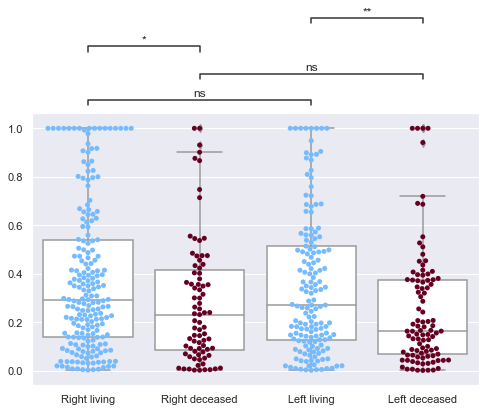

In [92]:
# Compression of expression of level of RGS5 gene by later_os_status

ax=sns.boxplot(x='Later os_status', y='LOC100505773', data=clinical_data, order=['Right living','Right deceased','Left living','Left deceased'],color='w')
palette={"Right living":"#75bbfd", "Right deceased":"#650021","Left living":"#75bbfd", "Left deceased":"#650021"}
sns.swarmplot(x='Later os_status', y='LOC100505773', data=clinical_data,order=['Right living','Right deceased','Left living','Left deceased'],palette=palette)
plt.xticks(rotation=0)
#adding statistical values on the graph
add_stat_annotation(ax, data=clinical_data, x='Later os_status', y='LOC100505773',order=['Right living','Right deceased','Left living','Left deceased'],
                boxPairList=[('Right living','Left living'),('Right deceased','Left deceased'),('Right living','Right deceased'),('Left living','Left deceased')], test='t-test_ind', textFormat='star', loc='outside', 
verbose=2)
plt.xlabel('')
plt.ylabel('')
plt.savefig('later_os.eps', format='eps',bbox_inches='tight', dpi=1000)
plt.show()

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Male_living v.s. Male_deceased: MWW RankSum two-sided P_val=2.233e-02 U_stat=1.496e+04
Male_living v.s. Female_living: MWW RankSum two-sided P_val=1.249e-02 U_stat=1.218e+04
Male_deceased v.s. Female_deceased: MWW RankSum two-sided P_val=9.087e-01 U_stat=3.514e+03
Female_deceased v.s. Female_living: MWW RankSum two-sided P_val=8.972e-04 U_stat=2.794e+03


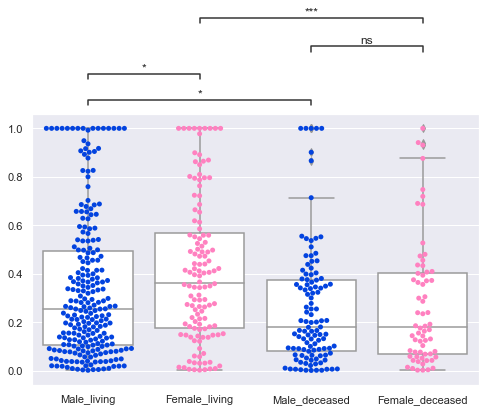

In [93]:
# Compression of expression of level of RGS5 gene by sex_and_os_status


sns.set(rc={'figure.figsize':(8,5)})
   
ax=sns.boxplot(x='sex_and_os_status', y='LOC100505773', data=clinical_data,color='w')
palette={"Male_living":"#0343df", "Female_living":"#ff81c0",'Male_deceased':'#0343df','Female_deceased':'#ff81c0'}
sns.swarmplot(x='sex_and_os_status', y='LOC100505773', data=clinical_data,palette=palette)
plt.xticks(rotation=0)
#adding statistical values on the graph
add_stat_annotation(ax, data=clinical_data, x='sex_and_os_status', y='LOC100505773',
                boxPairList=[('Male_living','Male_deceased'),('Male_living','Female_living'),('Male_deceased','Female_deceased'),('Female_deceased','Female_living')], test='Mann-Whitney', textFormat='star', loc='outside', 
verbose=2)
plt.xlabel('')
plt.ylabel('')
plt.savefig('os_gender.eps', format='eps',bbox_inches='tight', dpi=1000)
plt.show()


In [94]:
##create a new column(TUMOR_LATERALITY) depends on tumor status and laterality

clinical_data.loc[((clinical_data['TUMOR_STATUS']=='TUMOR FREE') &(clinical_data['LATERALITY']=='Right')), 'TUMOR_LATERALITY']='Tumor Free in Right'
clinical_data.loc[((clinical_data['TUMOR_STATUS']=='TUMOR FREE') &(clinical_data['LATERALITY']=='Left')),'TUMOR_LATERALITY']='Tumor Free in Left'
clinical_data.loc[((clinical_data['TUMOR_STATUS']=='WITH TUMOR') &(clinical_data['LATERALITY']=='Right')),'TUMOR_LATERALITY']='With Tumor in Right'
clinical_data.loc[((clinical_data['TUMOR_STATUS']=='WITH TUMOR') &(clinical_data['LATERALITY']=='Left')),'TUMOR_LATERALITY']='With Tumor in Left'

clinical_data['TUMOR_LATERALITY'].value_counts()

Tumor Free in Right    202
Tumor Free in Left     157
With Tumor in Left      77
With Tumor in Right     62
Name: TUMOR_LATERALITY, dtype: int64

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

With Tumor in Right v.s. With Tumor in Left: t-test independent samples, P_val=2.039e-01 stat=1.277e+00
Tumor Free in Right v.s. Tumor Free in Left: t-test independent samples, P_val=2.422e-01 stat=1.171e+00
Tumor Free in Right v.s. With Tumor in Right: t-test independent samples, P_val=4.875e-02 stat=1.980e+00
With Tumor in Left v.s. Tumor Free in Left: t-test independent samples, P_val=5.477e-03 stat=-2.804e+00


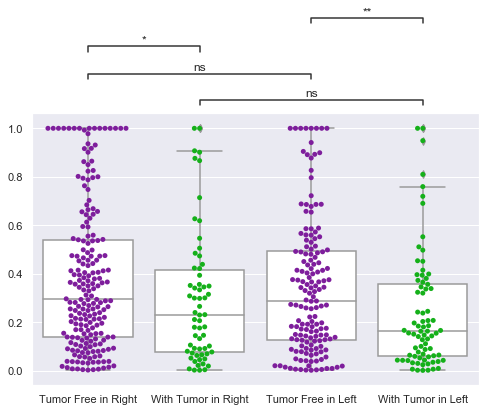

In [95]:
# Compression of expression of level of RGS5 gene by tumor status and laterality

sns.set(rc={'figure.figsize':(8,5)})
   
ax=sns.boxplot(x='TUMOR_LATERALITY', y='LOC100505773', data=clinical_data, order=['Tumor Free in Right','With Tumor in Right','Tumor Free in Left','With Tumor in Left' ],color='w')
palette={"Tumor Free in Right":'#7e1e9c',"Tumor Free in Left":'#7e1e9c','With Tumor in Right':'#15b01a','With Tumor in Left':'#15b01a'}
sns.swarmplot(x='TUMOR_LATERALITY', y='LOC100505773', data=clinical_data,order=['Tumor Free in Right','With Tumor in Right','Tumor Free in Left','With Tumor in Left' ],palette=palette)
plt.xticks(rotation=0)
#adding statistical values on the graph

add_stat_annotation(ax, data=clinical_data, x='TUMOR_LATERALITY', y='LOC100505773',order=['Tumor Free in Right','With Tumor in Right','Tumor Free in Left','With Tumor in Left' ],
                boxPairList=[('With Tumor in Right','With Tumor in Left'),('Tumor Free in Right','Tumor Free in Left'),('Tumor Free in Right','With Tumor in Right'),("With Tumor in Left", "Tumor Free in Left")], test='t-test_ind', textFormat='star', loc='outside', 
verbose=2)
plt.xlabel('')
plt.ylabel('')
plt.savefig('tumor_later.eps', format='eps',bbox_inches='tight', dpi=1000)
plt.show()

In [96]:
##create a new column(TUMOR_SEX) depends on tumor status and gender

clinical_data.loc[((clinical_data['TUMOR_STATUS']=='TUMOR FREE') &(clinical_data['SEX']=='Female')), 'TUMOR_SEX']='Tumor Free in Female'
clinical_data.loc[((clinical_data['TUMOR_STATUS']=='TUMOR FREE') &(clinical_data['SEX']=='Male')),'TUMOR_SEX']='Tumor Free in Male'
clinical_data.loc[((clinical_data['TUMOR_STATUS']=='WITH TUMOR') &(clinical_data['SEX']=='Female')),'TUMOR_SEX']='With Tumor in Female'
clinical_data.loc[((clinical_data['TUMOR_STATUS']=='WITH TUMOR') &(clinical_data['SEX']=='Male')),'TUMOR_SEX']='With Tumor in Male'
clinical_data['TUMOR_SEX'].value_counts()

Tumor Free in Male      228
Tumor Free in Female    132
With Tumor in Male      101
With Tumor in Female     38
Name: TUMOR_SEX, dtype: int64

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

With Tumor in Female v.s. With Tumor in Male: t-test independent samples, P_val=5.236e-01 stat=6.395e-01
With Tumor in Female v.s. Tumor Free in Female: t-test independent samples, P_val=4.998e-02 stat=-1.974e+00
Tumor Free in Female v.s. Tumor Free in Male: t-test independent samples, P_val=1.783e-01 stat=1.349e+00
With Tumor in Male v.s. Tumor Free in Male: t-test independent samples, P_val=6.154e-03 stat=-2.757e+00


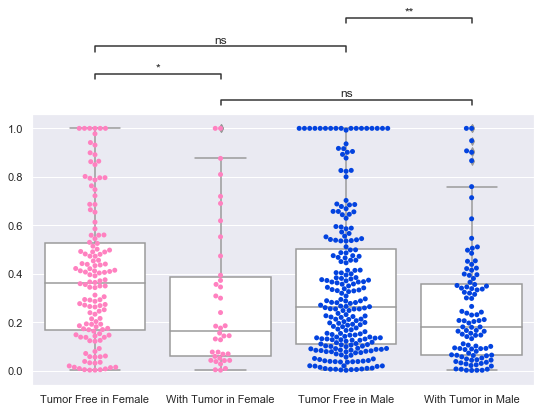

In [97]:
# Compression of expression of level of RGS5 gene by tumor status and gender

sns.set(rc={'figure.figsize':(9,5)})
   
ax=sns.boxplot(x='TUMOR_SEX', y='LOC100505773', data=clinical_data,order=["Tumor Free in Female",'With Tumor in Female' ,'Tumor Free in Male','With Tumor in Male'],color='w')
palette={"Tumor Free in Male":"#0343df","With Tumor in Male":"#0343df", "Tumor Free in Female":"#ff81c0", "With Tumor in Female":"#ff81c0"}
sns.swarmplot(x='TUMOR_SEX', y='LOC100505773', data=clinical_data,order=["Tumor Free in Female",'With Tumor in Female' ,'Tumor Free in Male','With Tumor in Male'],palette=palette)
plt.xticks(rotation=0)
#adding statistical values on the graph
add_stat_annotation(ax, data=clinical_data, x='TUMOR_SEX', y='LOC100505773',order=["Tumor Free in Female",'With Tumor in Female' ,'Tumor Free in Male','With Tumor in Male'],
                boxPairList=[('With Tumor in Female','With Tumor in Male'),('With Tumor in Female', "Tumor Free in Female"),("Tumor Free in Female",'Tumor Free in Male'),('With Tumor in Male','Tumor Free in Male')], test='t-test_ind', textFormat='star', loc='outside', 
verbose=2)

plt.xlabel('')
plt.ylabel('')
plt.savefig('tumor_gender.eps', format='eps',bbox_inches='tight', dpi=1000)
plt.show()


In [98]:
##create a new column(SEX_LATERALITY) depends on laterality and gender

clinical_data.loc[((clinical_data['SEX']=='Female') &(clinical_data['LATERALITY']=='Right')), 'SEX_LATERALITY']='Female in Right'
clinical_data.loc[((clinical_data['SEX']=='Female') &(clinical_data['LATERALITY']=='Left')),'SEX_LATERALITY']='Female in Left'
clinical_data.loc[((clinical_data['SEX']=='Male') &(clinical_data['LATERALITY']=='Right')),'SEX_LATERALITY']='Male in Right'
clinical_data.loc[((clinical_data['SEX']=='Male') &(clinical_data['LATERALITY']=='Left')),'SEX_LATERALITY']='Male in Left'

clinical_data['SEX_LATERALITY'].value_counts()

Male in Right      183
Male in Left       162
Female in Right     98
Female in Left      89
Name: SEX_LATERALITY, dtype: int64

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Male in Right v.s. Female in Right: MWW RankSum two-sided P_val=9.926e-01 U_stat=8.974e+03
Female in Right v.s. Female in Left: MWW RankSum two-sided P_val=3.986e-01 U_stat=4.048e+03
Female in Left v.s. Male in Left: MWW RankSum two-sided P_val=1.828e-03 U_stat=8.924e+03
Male in Right v.s. Male in Left: MWW RankSum two-sided P_val=9.945e-03 U_stat=1.721e+04


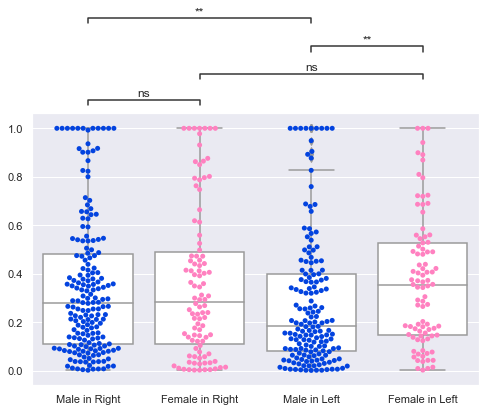

In [99]:
# Compression of expression of level of RGS5 gene by sex_lateraliy

sns.set(rc={'figure.figsize':(8,5)})
   
ax=sns.boxplot(x='SEX_LATERALITY', y='LOC100505773', data=clinical_data,color='w')
palette={"Male in Right":"#0343df","Male in Left":"#0343df", "Female in Right":"#ff81c0", "Female in Left":"#ff81c0"}
sns.swarmplot(x='SEX_LATERALITY', y='LOC100505773', data=clinical_data,palette=palette)
plt.xticks(rotation=0)
#adding statistical values on the graph
add_stat_annotation(ax, data=clinical_data, x='SEX_LATERALITY', y='LOC100505773',
                boxPairList=[('Male in Right','Female in Right'),('Female in Right','Female in Left'),('Female in Left','Male in Left'),('Male in Right', 'Male in Left')], test='Mann-Whitney', textFormat='star', loc='outside', 
verbose=2)

plt.xlabel('')
plt.ylabel('')
plt.savefig('later_gender.eps', format='eps',bbox_inches='tight', dpi=1000)
plt.show()